In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import matplotlib.pyplot as plt 

In [11]:
data = load_iris()
X = data.data
y = data.target

In [12]:
df = pd.DataFrame(X, columns=data.feature_names)
df['true_species'] = y

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


=== K-Means with K=2 ===
Inertia: 222.36
Cluster Centers:
  Cluster 0: [ 0.50728948 -0.42663134  0.65249366  0.62744675]
  Cluster 1: [-1.01457897  0.85326268 -1.30498732 -1.25489349]


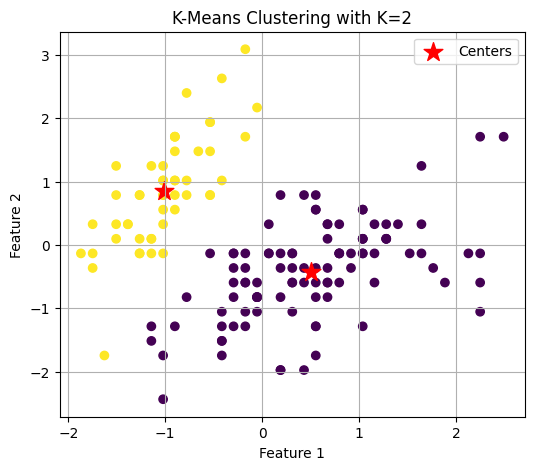


=== K-Means with K=3 ===
Inertia: 140.90
Cluster Centers:
  Cluster 0: [1.03359865 0.00613858 0.94360463 0.9725624 ]
  Cluster 1: [-1.00206653  0.90625492 -1.30310821 -1.25634413]
  Cluster 2: [-0.16840578 -0.9726981   0.2598706   0.17543327]


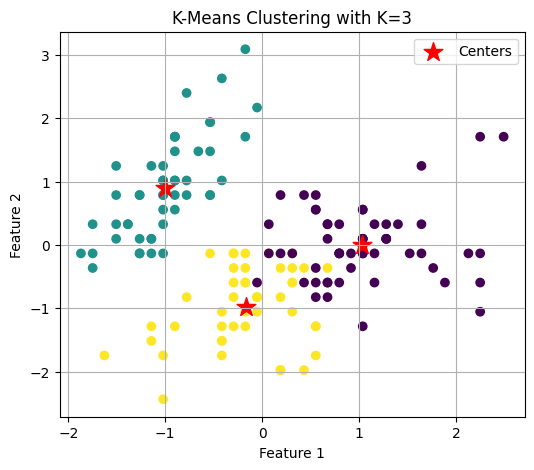


=== K-Means with K=4 ===
Inertia: 114.56
Cluster Centers:
  Cluster 0: [-0.40591237 -1.35010403  0.0404493  -0.03751517]
  Cluster 1: [-1.00206653  0.90625492 -1.30310821 -1.25634413]
  Cluster 2: [1.40150837 0.23797961 1.17888943 1.24668215]
  Cluster 3: [ 0.40001883 -0.38096782  0.6096452   0.56232911]


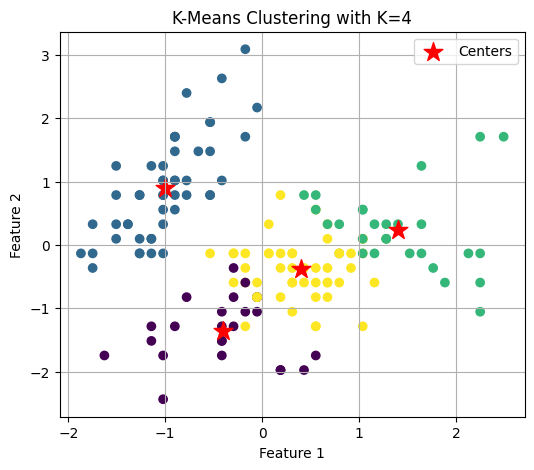

In [25]:
k_values = [2, 3, 4]
inertias = []
models = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    models[k] = kmeans
    inertias.append(kmeans.inertia_)
    
    print(f"\n=== K-Means with K={k} ===")
    print(f"Inertia: {kmeans.inertia_:.2f}")
    print(f"Cluster Centers:")
    for i, center in enumerate(kmeans.cluster_centers_):
        print(f"  Cluster {i}: {center}")

    plt.figure(figsize=(6, 5))
    plt.title(f"K-Means Clustering with K={k}")
    scatter = plt.scatter(
        X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels
    )
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        s=200, c='red', marker='*', label='Centers'
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

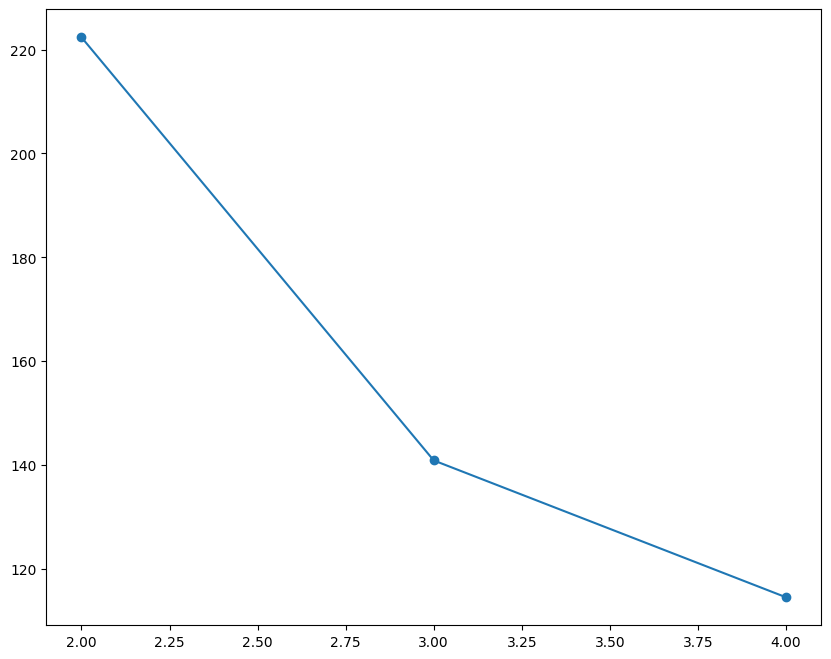

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(k_values, inertias, marker="o")